In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("CC GENERAL.csv")
df = data.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# To obtain the shape of a DataFrame.
df.shape

(8950, 18)

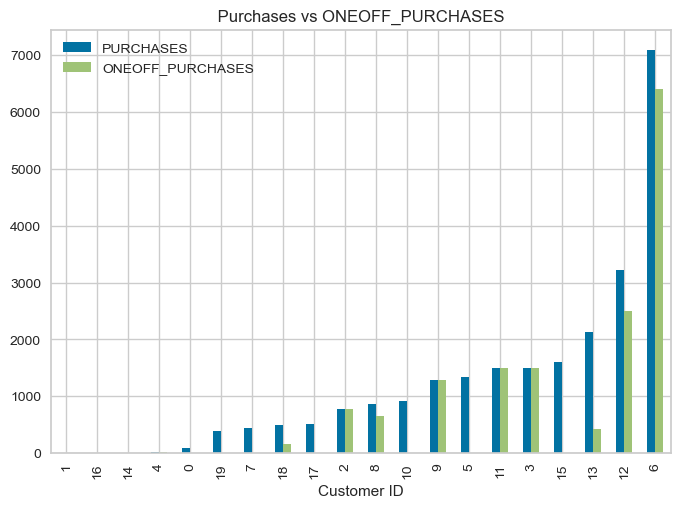

In [6]:
balance_purchase_data = df[['PURCHASES', 'ONEOFF_PURCHASES']]
balance_purchase_data1= balance_purchase_data.head(20).sort_values(by='PURCHASES')
# Plotting the bar chart
balance_purchase_data1.plot(kind='bar')
plt.xlabel('Customer ID')

plt.title(' Purchases vs ONEOFF_PURCHASES ')
plt.show()

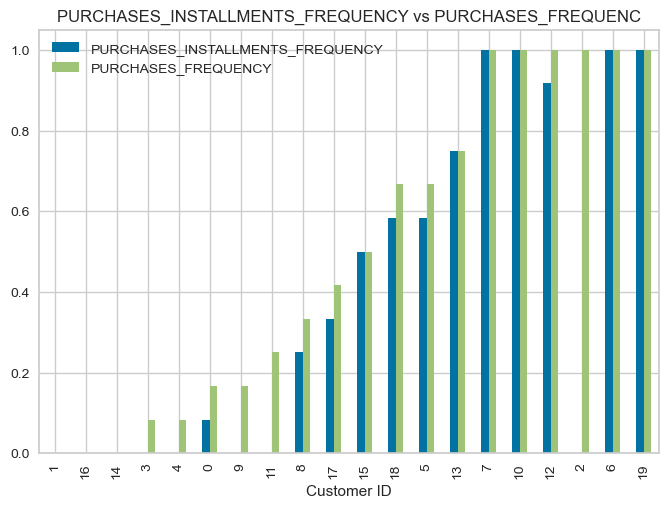

In [7]:

balance_purchase_data = df[['PURCHASES_INSTALLMENTS_FREQUENCY' ,'PURCHASES_FREQUENCY']]
balance_purchase_data1= balance_purchase_data.head(20).sort_values(by='PURCHASES_FREQUENCY')
# Plotting the bar chart
balance_purchase_data1.plot(kind='bar')
plt.xlabel('Customer ID')
plt.title('PURCHASES_INSTALLMENTS_FREQUENCY vs PURCHASES_FREQUENC')
plt.show()

In [8]:
# To return the description of the data in the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [9]:
# To print the  information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
#To get a count of the null values in each column. 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
#To check Whether the data contains duplicate rows
df.duplicated().sum()

0

In [14]:
#we have to remove the CUST_ID from data because its the unique value that can't be used for our models
df.drop("CUST_ID",axis = 1,inplace = True)

In [15]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
#To the coloumns that dataset contains

df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

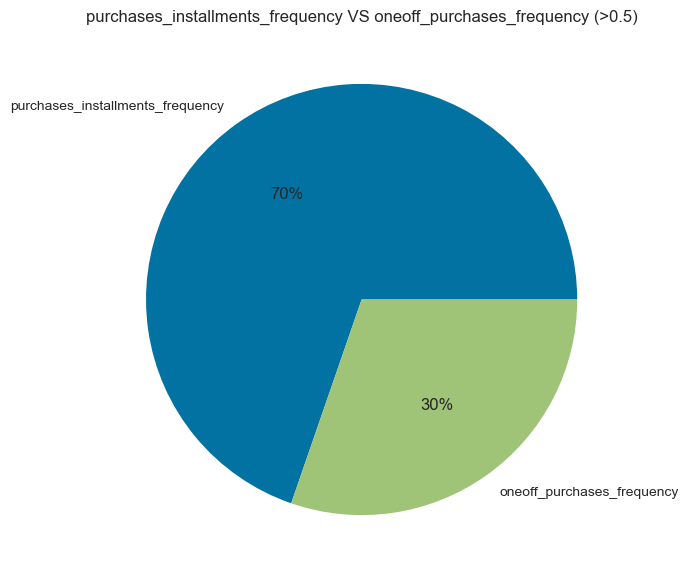

In [103]:
#Plotting the pie Chart
plt.figure(figsize=(7,7))
plt.pie([len(df[df['PURCHASES_INSTALLMENTS_FREQUENCY'] > .5]),
         len(df[df['ONEOFF_PURCHASES_FREQUENCY'] > .5])], 
        labels = ['purchases_installments_frequency', 
                  'oneoff_purchases_frequency'], 
        autopct='%.0f%%')
plt.title('purchases_installments_frequency VS oneoff_purchases_frequency (>0.5)');

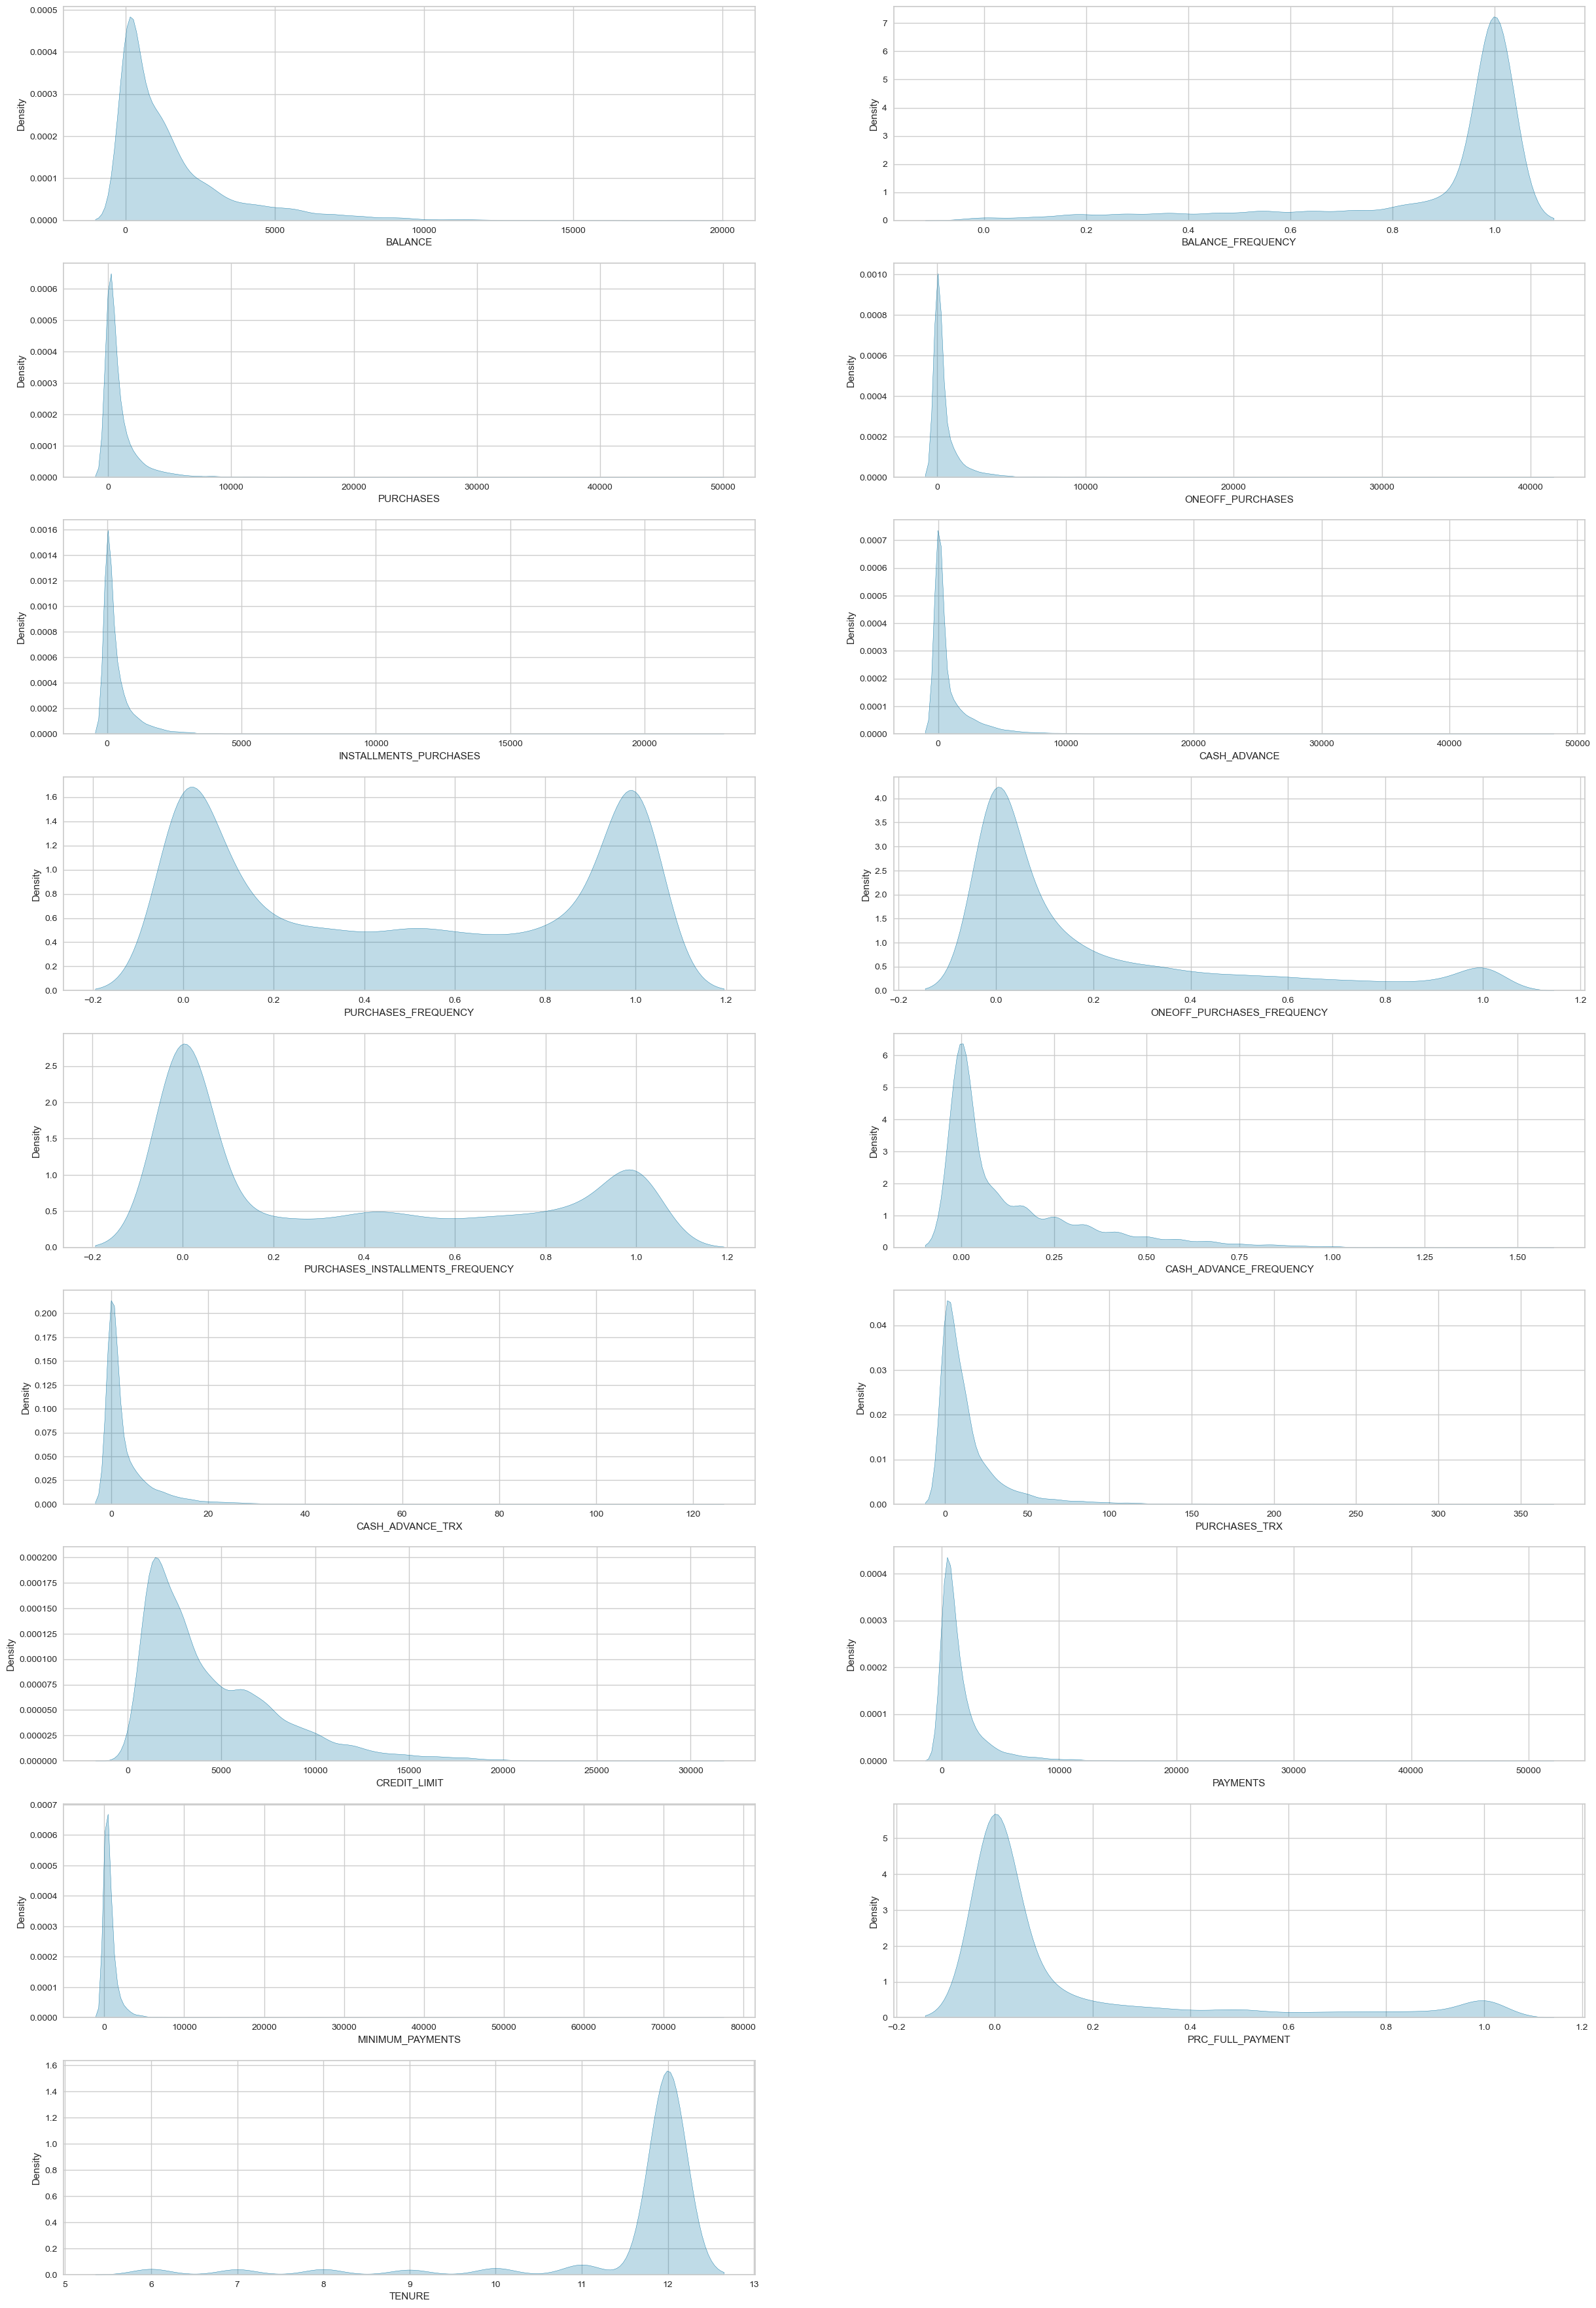

In [17]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax,shade = True)
        plt.xlabel(col)
        
plt.show()

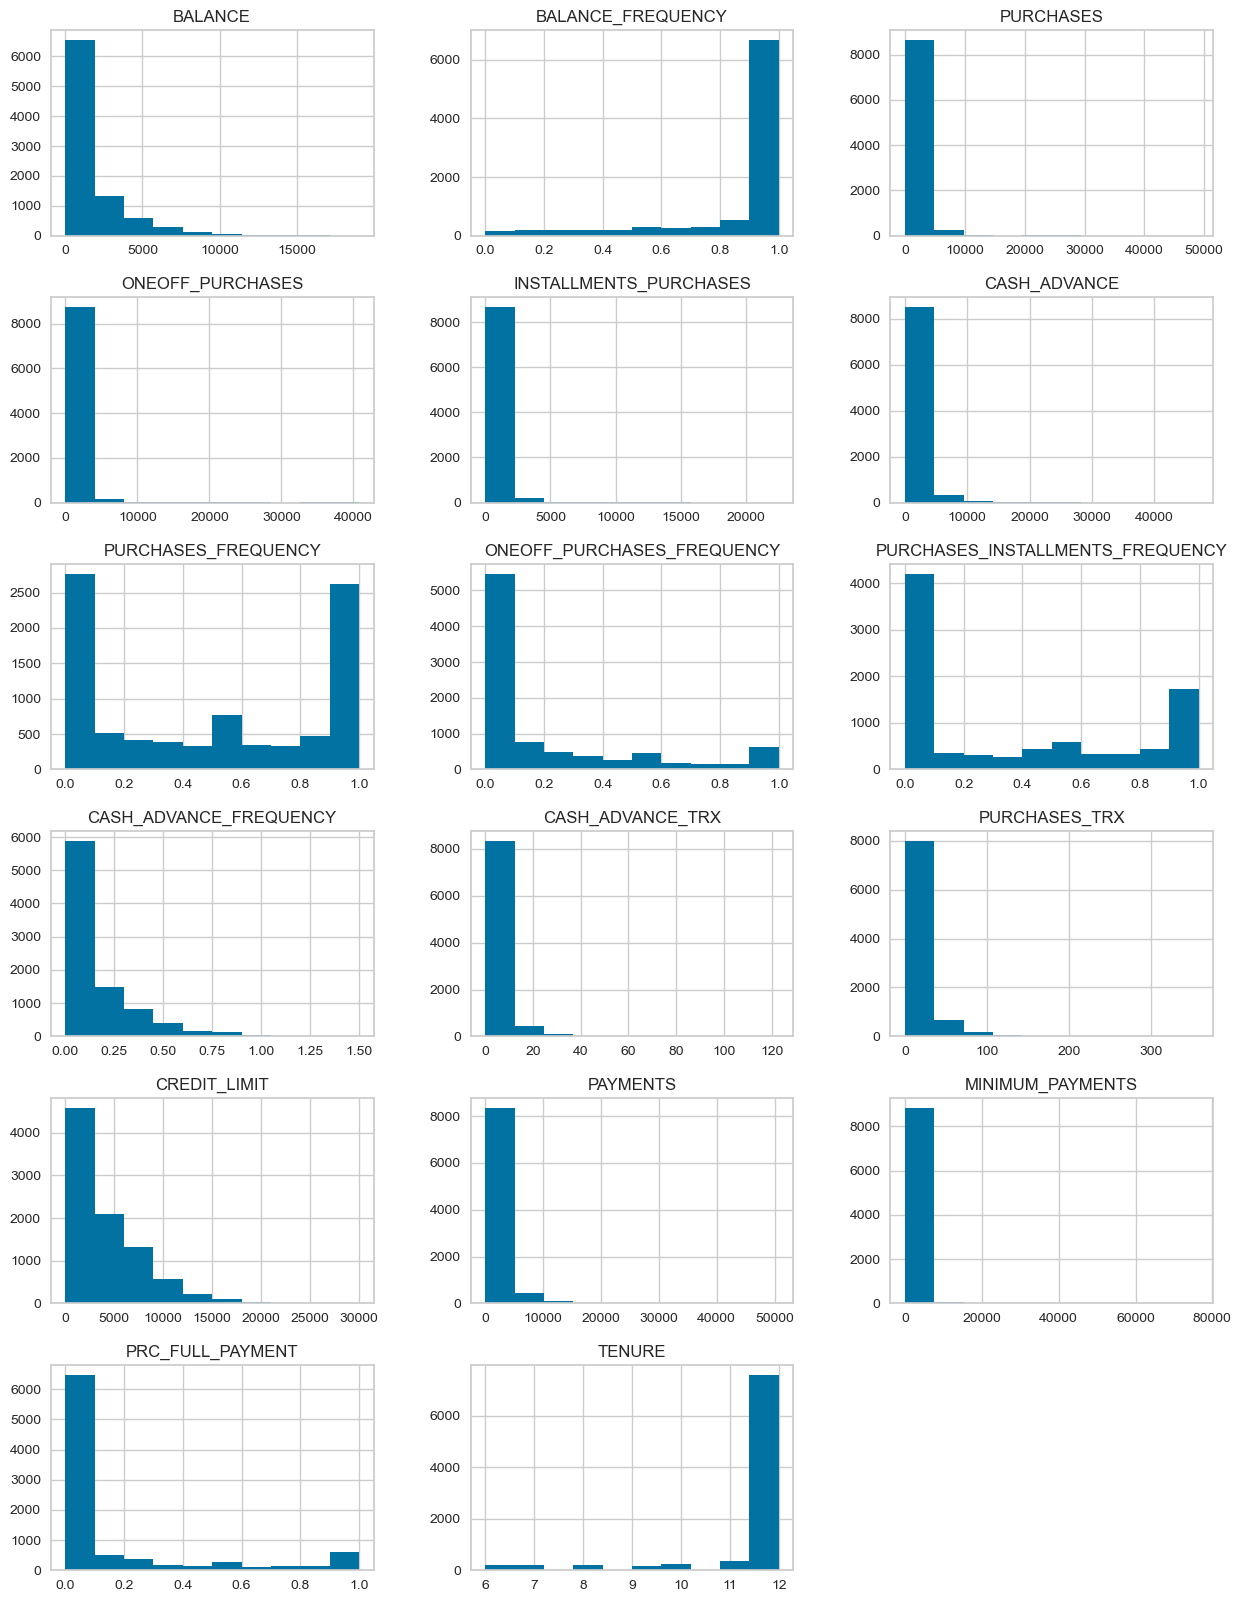

In [18]:
df.hist(figsize=(15, 20), layout=(6, 3));

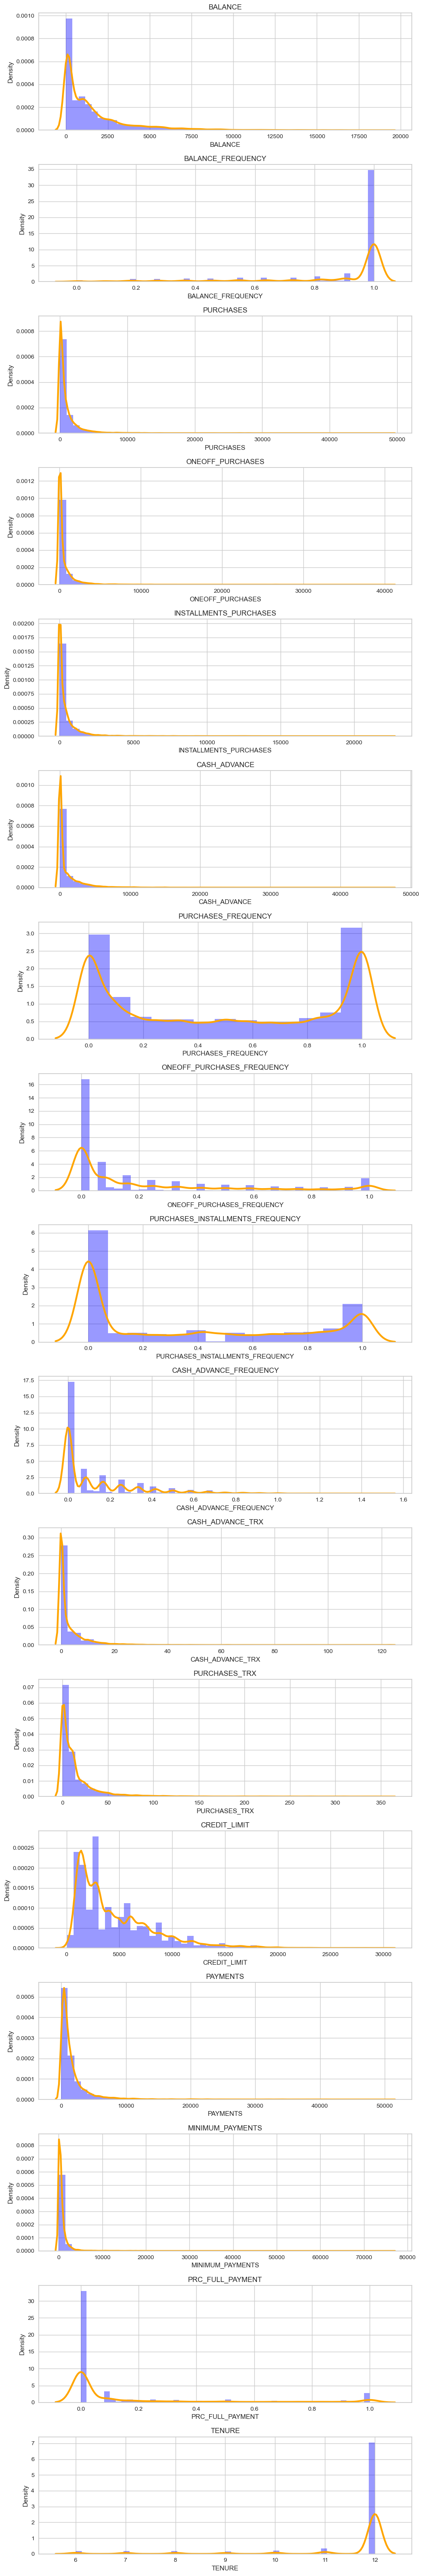

In [19]:

# Set the figure size
plt.figure(figsize=(10, 60))

# Iterate over the columns
for i in range(17):
    # Create a subplot
    ax = plt.subplot(17, 1, i+1)

    # Create a KDE plot and a histogram
    sns.distplot(df[df.columns[i]], kde_kws={'color': 'orange', 'bw': 0.1, 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'blue'}, ax=ax)

    # Set the title of the subplot
    ax.set_title(df.columns[i])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


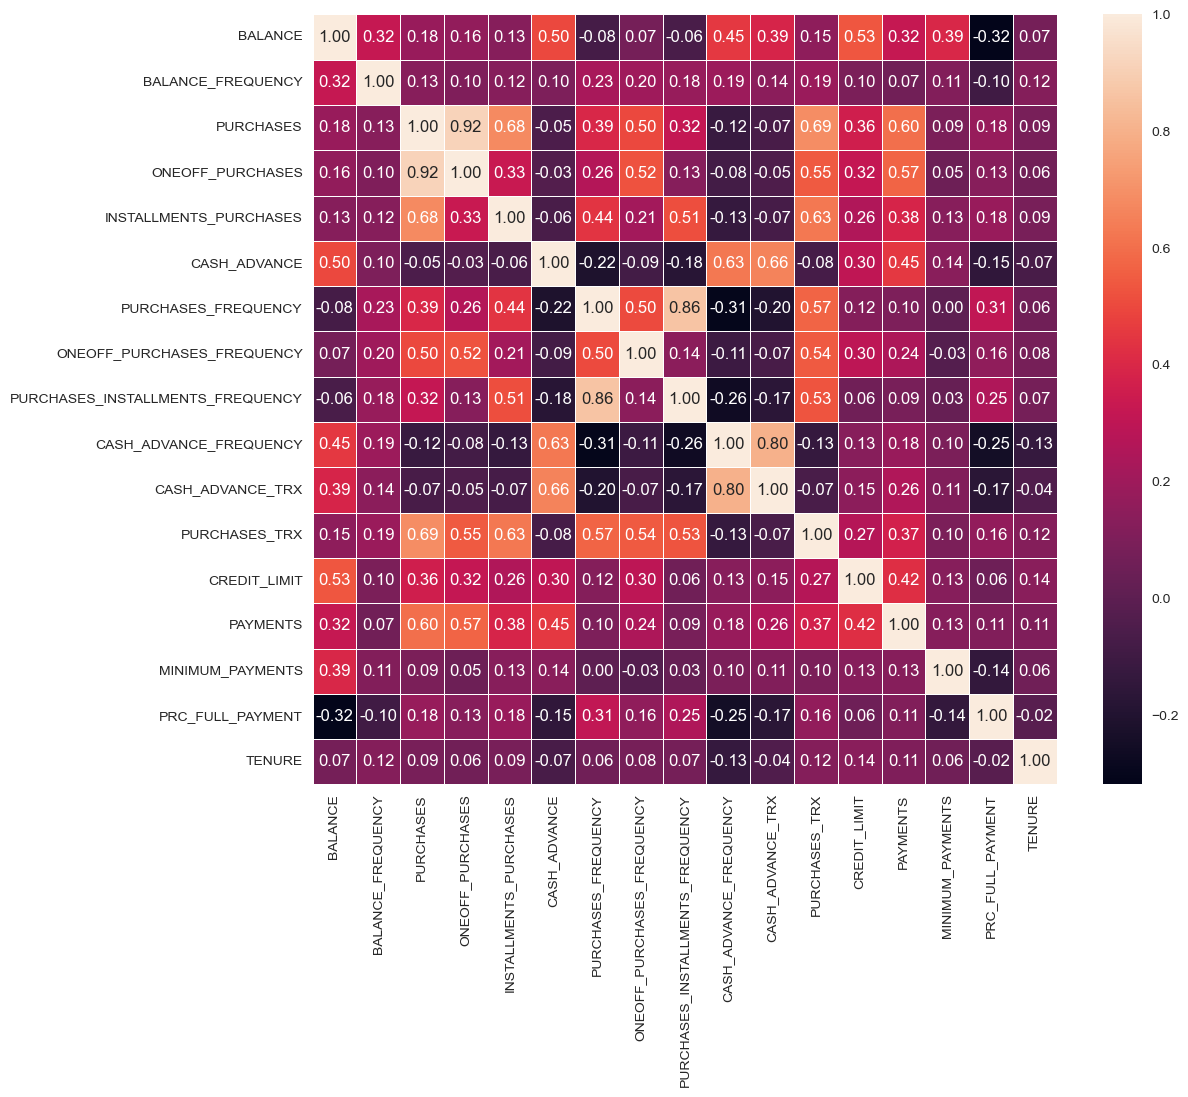

In [21]:
plt.figure(figsize = (12,10))
cor = df.corr()
sns.heatmap(cor, annot=True,linewidth=0.5,fmt="0.2f")
plt.show()

In [22]:
for x in range(len(cor)):
    cor.iloc[x,x]=0
cor

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,0.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,0.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,0.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,0.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,0.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,0.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,0.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,0.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,0.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,0.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


In [23]:
cor.abs().max().sort_values(ascending = False)

PURCHASES                           0.916845
ONEOFF_PURCHASES                    0.916845
PURCHASES_INSTALLMENTS_FREQUENCY    0.862934
PURCHASES_FREQUENCY                 0.862934
CASH_ADVANCE_FREQUENCY              0.799561
CASH_ADVANCE_TRX                    0.799561
PURCHASES_TRX                       0.689561
INSTALLMENTS_PURCHASES              0.679896
CASH_ADVANCE                        0.656498
PAYMENTS                            0.603264
ONEOFF_PURCHASES_FREQUENCY          0.544869
CREDIT_LIMIT                        0.531267
BALANCE                             0.531267
MINIMUM_PAYMENTS                    0.394282
BALANCE_FREQUENCY                   0.322412
PRC_FULL_PAYMENT                    0.318959
TENURE                              0.139034
dtype: float64

### Feature Scaling or Data Normalization

 Feature scaling is a method used to normalize the range of independent variables or features of data.
 
 Here we use **StandardScaler**, StandardScaler or Z-Score Normalization is one of the feature scaling techniques, here the transformation of features is done by subtracting from the mean and dividing by standard deviation 

In [24]:
scalar=StandardScaler()
df_scaled = scalar.fit_transform(df)

In [25]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### Dimensionality Reduction

Dimensionality reduction is a technique in data science and machine learning that involves reducing the number of data features while retaining the important information they contain. This is achieved by mapping high-dimensional data into a lower-dimensional space. The goal is to simplify the data representation without losing its meaningful parts.

Here we intended to use **Principal Component Analysis (PCA)** : PCA, or Principal Component Analysis, is a statistical technique used to reduce the dimensionality of a dataset while retaining its most significant information. It works by identifying the linear combinations of variable features that account for the largest amount of variation in the data. These new features, called principal components, are ordered according to their importance and can be used to represent the original dataset in a more compact form. 

In [26]:
pca = PCA().fit(df_scaled)

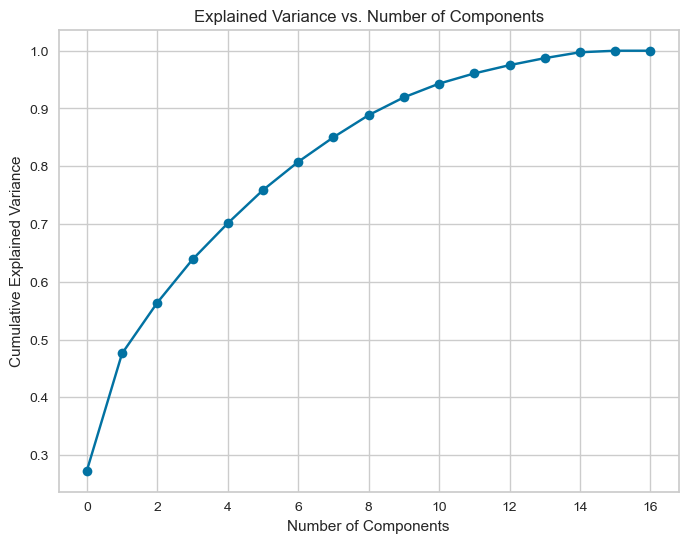

Number of components capturing 80.0% variance: 7


In [27]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Identify the number of components capturing a specific percentage of variance
desired_variance = 0.80  # Adjust as needed
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of components capturing {desired_variance * 100}% variance: {num_components}")

In [28]:
pca_main = PCA(n_components=7)
principal_components =pca_main.fit_transform(df_scaled)

In [29]:
principal_components.shape

(8950, 7)

In [30]:
#Now we are making a data frame with principal_components

df_pca = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7"])
df_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923
...,...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305,-1.523465
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215,-1.083192
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948,-1.369823
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380,-0.930511


###  Hyperparameter tuning

For KMeans clustering we have to choose the optimal number of clusters that is **k**, for that we have differnet methods for finding the optimal number clusters.

So we are using **Elbow** method for finding number of optimal clusters

In [31]:
Sum_of_Squared_dist = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_pca)
    Sum_of_Squared_dist.append(kmeans.inertia_)

In [32]:
Sum_of_Squared_dist

[122882.76222665442,
 98659.91437864854,
 83007.69318445076,
 70280.10927568126,
 63289.06819471791,
 57640.438937468396,
 53803.97322399099,
 48627.20618347514,
 45582.29825732836,
 42634.268032999185]

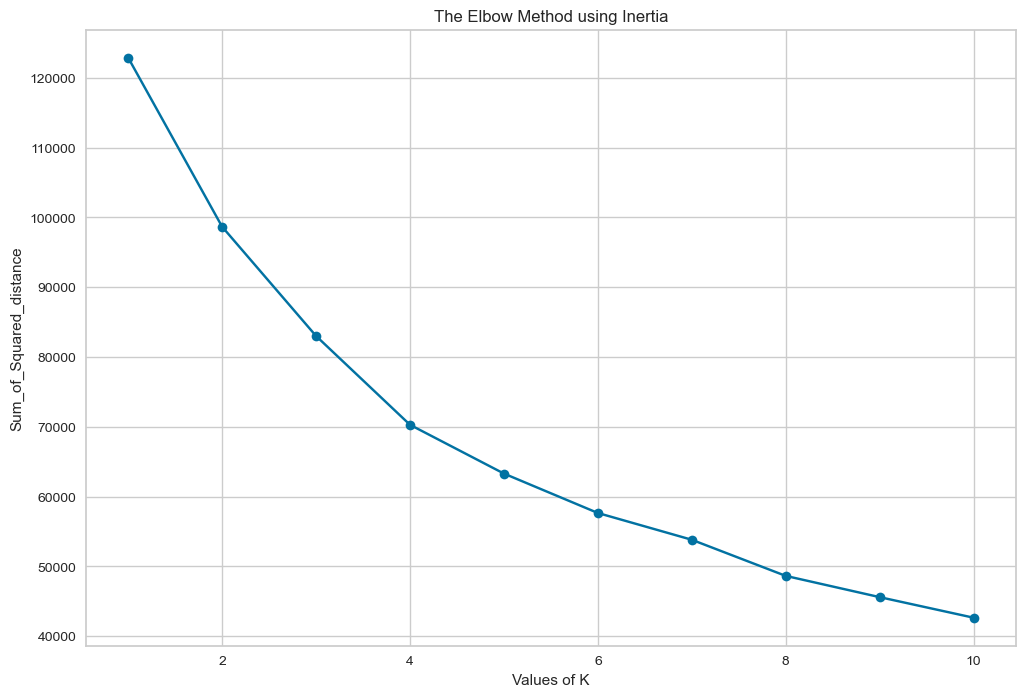

In [33]:
figure = plt.figure(figsize = (12,8))
plt.plot(K,Sum_of_Squared_dist,'-o')
plt.xlabel('Values of K') 
plt.ylabel('Sum_of_Squared_distance') 
plt.title('The Elbow Method using Inertia') 
plt.show()


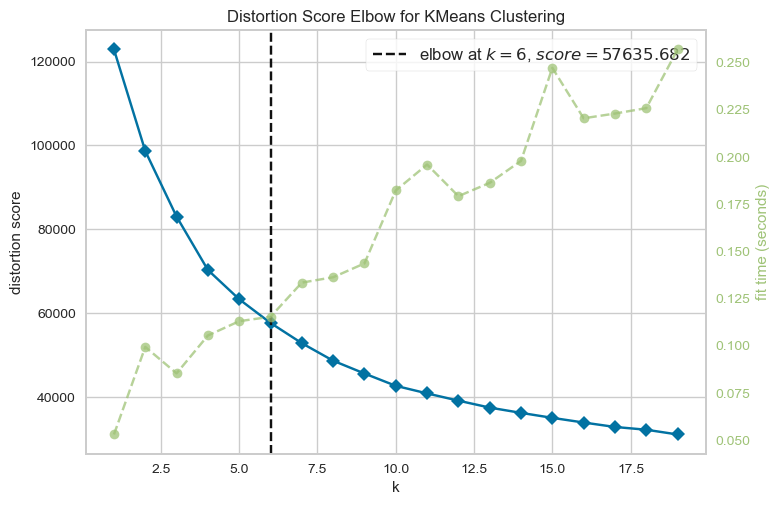

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
elbow = KElbowVisualizer(kmeans, k=(1, 20))
elbow.fit(df_pca)
elbow.show()

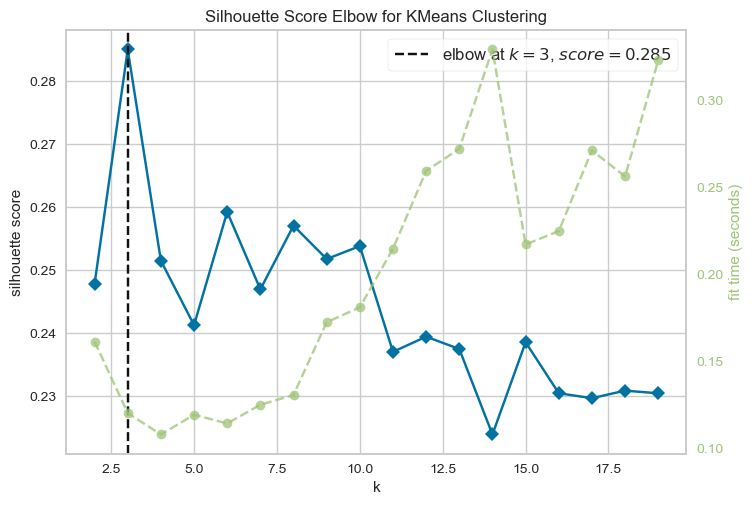

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [35]:
model = KMeans(random_state=42) 
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette')

visualizer.fit(df_pca)    
visualizer.poof()

**We have K found k value from 2 methods for Elbow method we have K=6 and for the Silhouette method we have k = 3** 

**For now let us consider the Silhouette method with K = 3**


## Model Building using KMeans

In [36]:
km = KMeans(n_clusters=3)
km.fit_predict(df_pca)

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

In [37]:
df_pca_kmeans = pd.concat([df_pca,pd.DataFrame({'Cluster':km.labels_})],axis=1)

In [38]:
df_pca_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Cluster
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,1
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,2
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,1
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,1
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,1


### Ploting the clusters

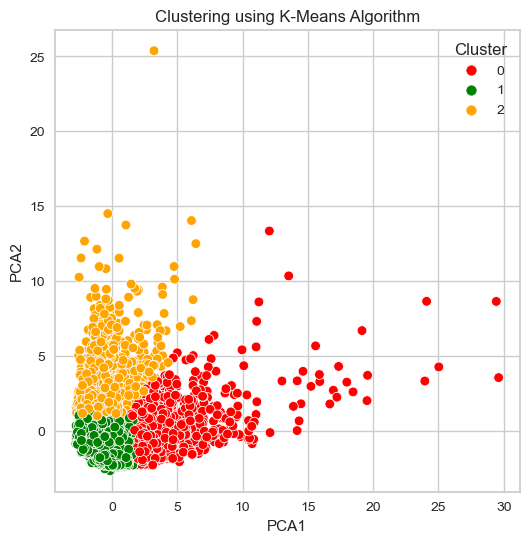

In [39]:
plt.figure(figsize=(6,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=df_pca_kmeans,palette=['red','green','orange','black','pink','yellow','violet','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [40]:
km.cluster_centers_

array([[ 3.79255212e+00, -1.96338157e-01,  7.54451504e-02,
         9.97913567e-02, -3.11418647e-01,  2.07301497e-02,
        -1.85610669e-01],
       [-6.11718936e-01, -7.30711501e-01,  5.36222275e-02,
         6.05284958e-02,  6.55408168e-02,  3.13478548e-02,
         7.63408744e-02],
       [-7.36019941e-01,  3.03029714e+00, -2.72859159e-01,
        -3.20102185e-01,  3.45778064e-04, -1.40180625e-01,
        -1.46100764e-01]])

In [42]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(df_pca, km.labels_).round(2)
kmeans_silhouette
    

0.28

In [43]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':km.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [44]:
cluster_df_1 = cluster_df[cluster_df["Cluster"]==0]
cluster_df_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12,0
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,0
34,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12,0
37,4047.480828,1.000000,2380.55,1642.17,738.38,1697.660901,0.750000,0.500000,0.750000,0.333333,7,41,5000.0,1617.894416,1541.141605,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,0
8698,873.680279,1.000000,2397.05,1072.46,1324.59,1657.160669,1.000000,0.500000,0.916667,0.583333,12,23,2500.0,2028.986135,297.682079,0.083333,12,0
8707,78.448912,1.000000,1875.18,977.85,897.33,0.000000,1.000000,0.833333,0.916667,0.000000,0,78,1200.0,1656.503571,172.161277,1.000000,12,0
8737,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,16,82,9000.0,8176.953944,602.963244,0.000000,12,0


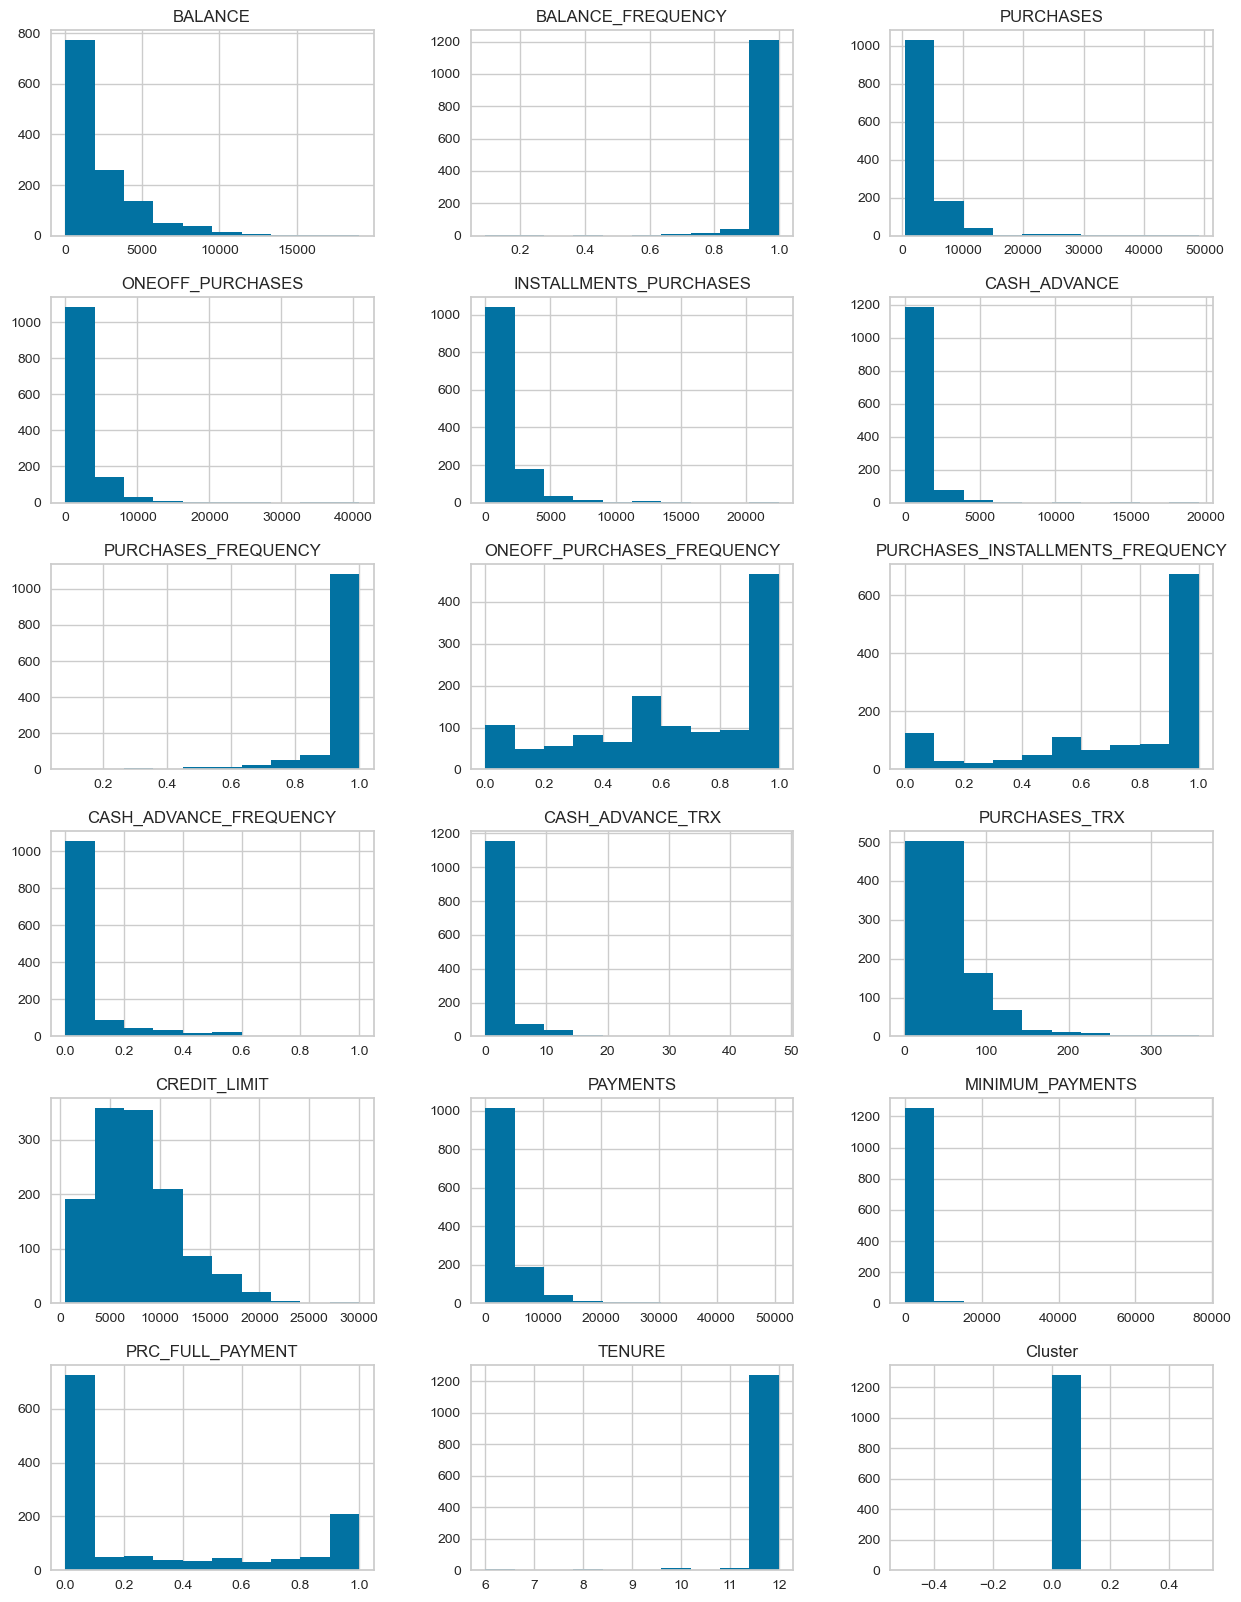

In [45]:
cluster_df_1.hist(figsize=(15, 20), layout=(6, 3));

In [46]:
cluster_df_2 = cluster_df[cluster_df["Cluster"]==1]
cluster_df_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,1


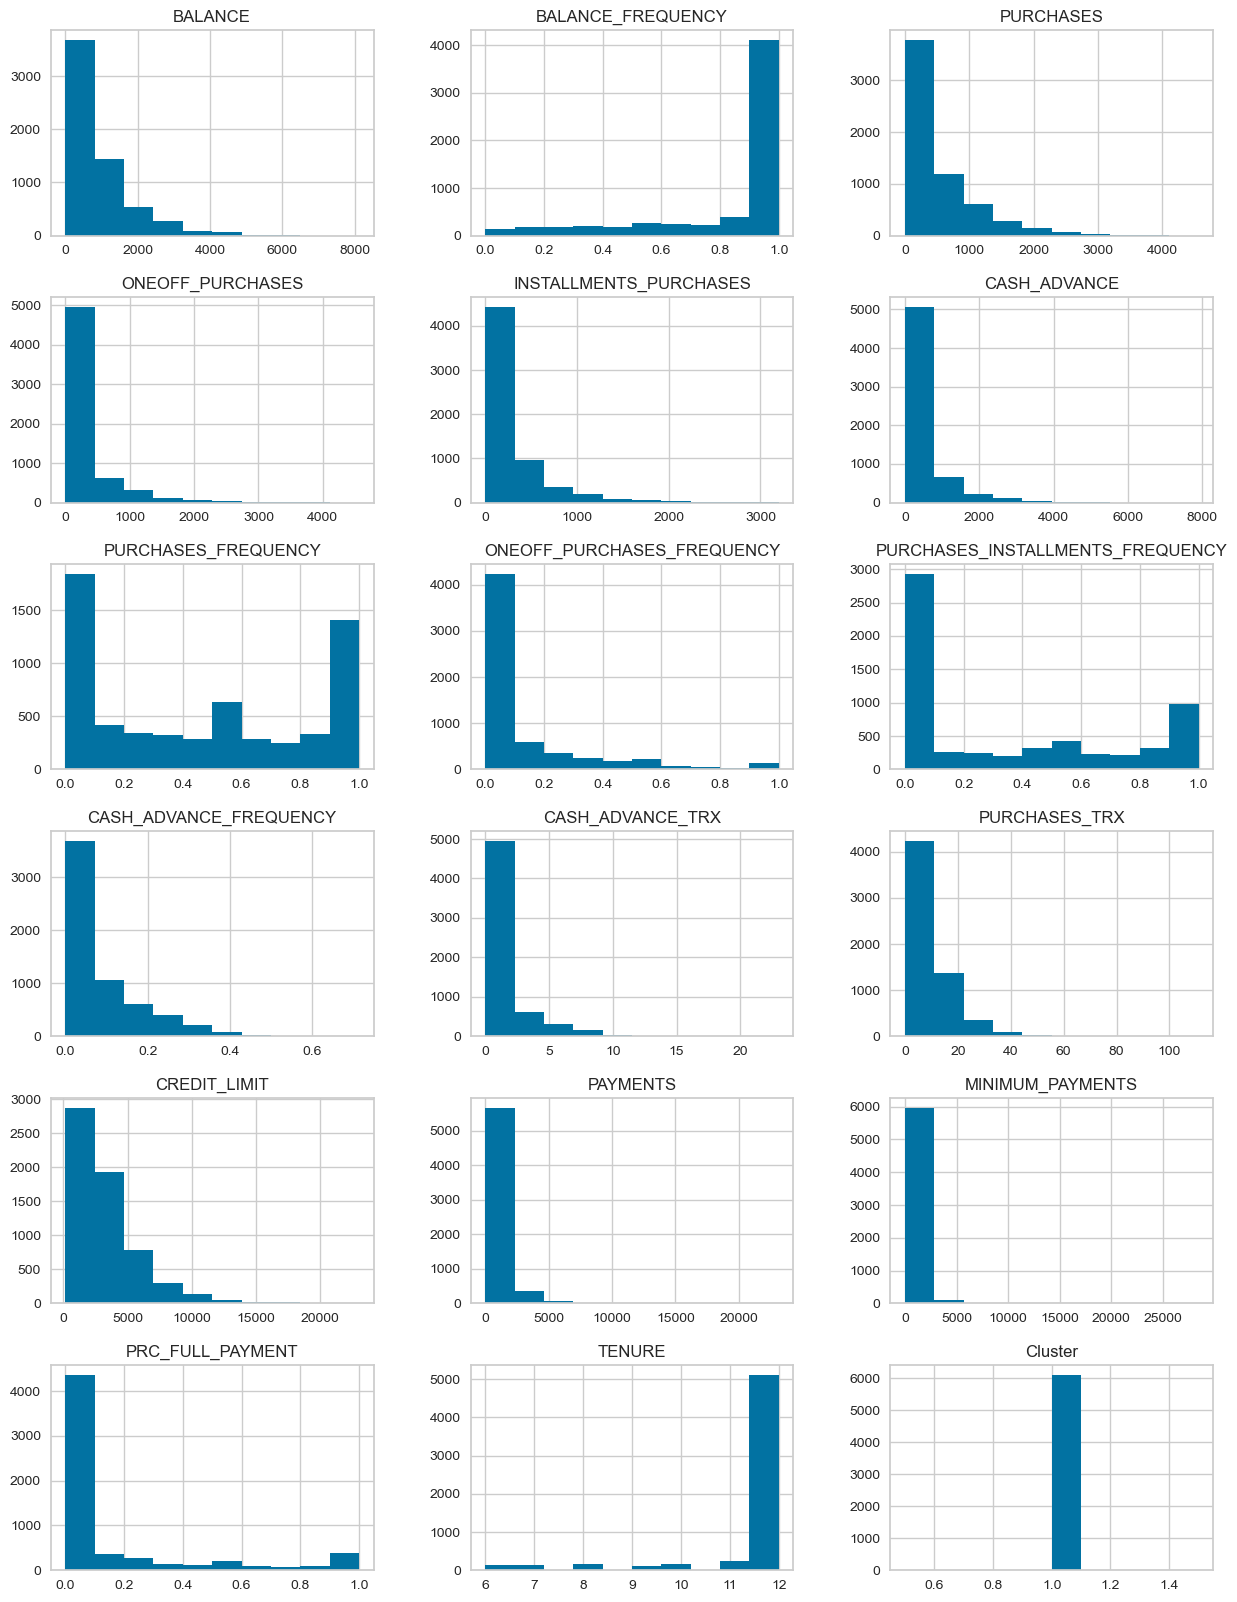

In [47]:
cluster_df_2.hist(figsize=(15, 20), layout=(6, 3));

In [48]:
cluster_df_3 = cluster_df[cluster_df["Cluster"]==2]
cluster_df_3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,2
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,2
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,2
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,2
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,2
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,2
8917,1880.817982,1.000000,0.00,0.00,0.00,2335.949930,0.000000,0.000000,0.000000,0.333333,5,0,2500.0,221.568190,374.197621,0.000000,6,2


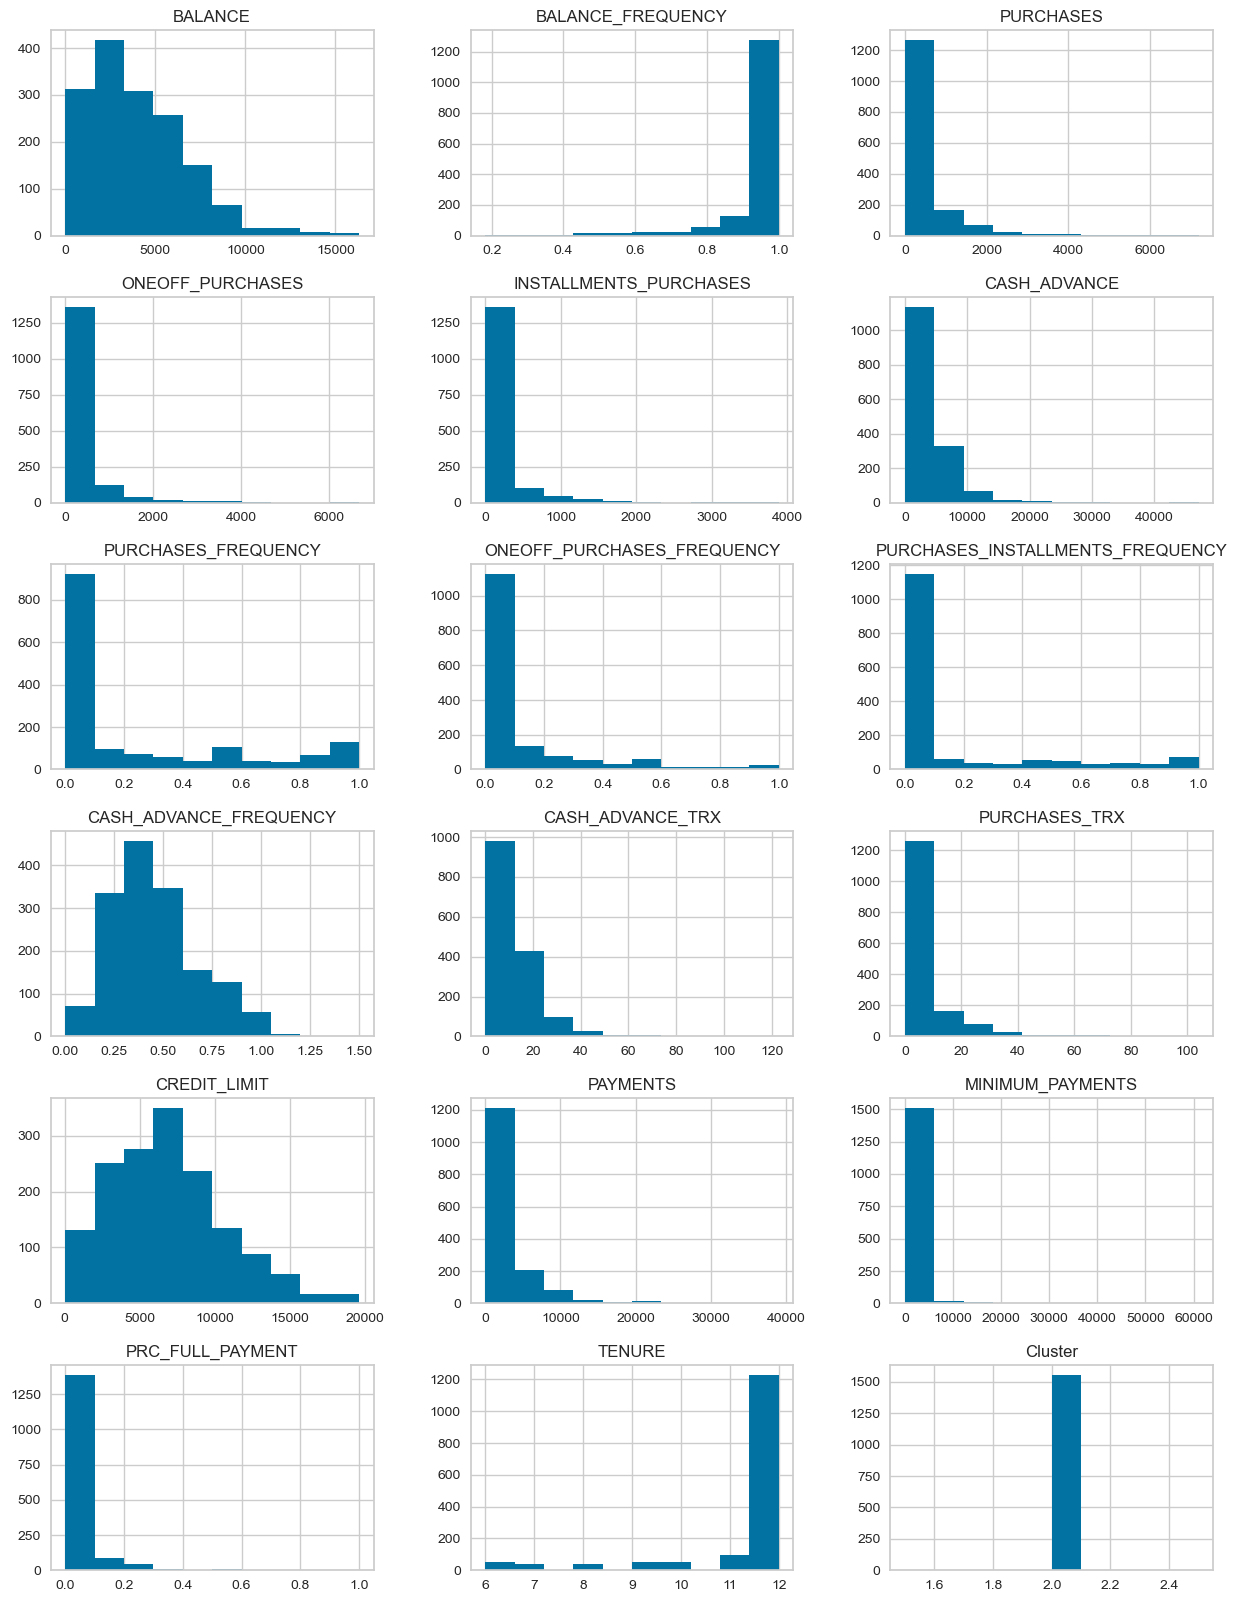

In [49]:
cluster_df_3.hist(figsize=(15, 20), layout=(6, 3));

<Axes: xlabel='Cluster', ylabel='count'>

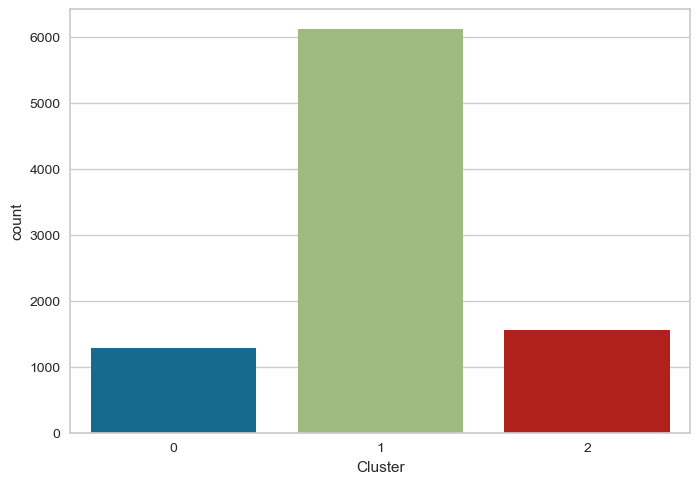

In [69]:
sns.countplot(x='Cluster', data=cluster_df)

In [98]:
AC = AgglomerativeClustering(n_clusters = 3)
AC.fit_predict(df_pca)


array([0, 2, 0, ..., 0, 0, 0])

In [99]:
df_pca_ac = pd.concat([df_pca,pd.DataFrame({'Cluster':AC.labels_})],axis=1)
df_pca_ac

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Cluster
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,0
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,2
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,0
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,0
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,0
...,...,...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305,-1.523465,0
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215,-1.083192,0
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948,-1.369823,0
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380,-0.930511,0


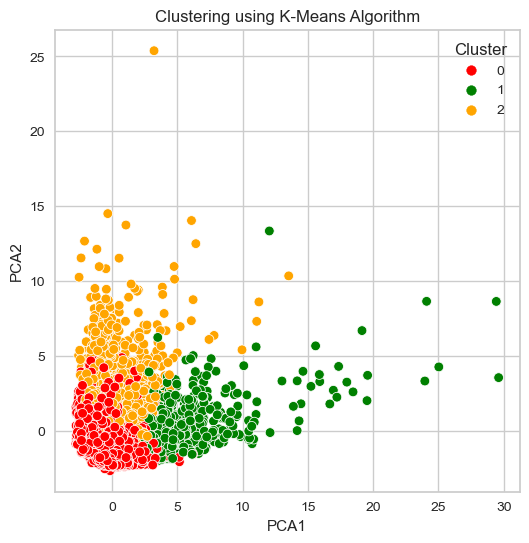

In [100]:
plt.figure(figsize=(6,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=df_pca_ac,palette=['red','green','orange','black','pink','yellow','violet','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [121]:
agg_silhouette = silhouette_score(df_pca, AC.labels_,metric = 'euclidean').round(2)
agg_silhouette

0.26

In [118]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Model', 'Silhouette_Score']
table.add_row(["K-means", kmeans_silhouette])
table.add_row(["Agglomerative Clustering", agg_silhouette])
print(table)

+--------------------------+------------------+
|          Model           | Silhouette_Score |
+--------------------------+------------------+
|         K-means          |       0.28       |
| Agglomerative Clustering |       0.26       |
+--------------------------+------------------+


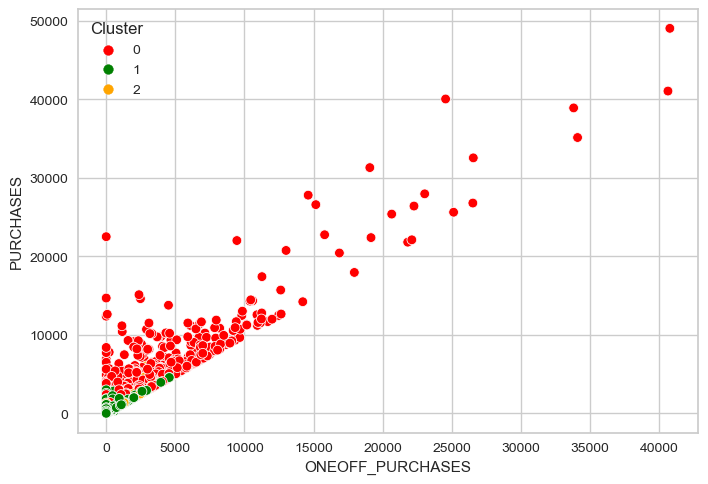

In [70]:
ax = sns.scatterplot(data =cluster_df,x= 'ONEOFF_PURCHASES',y='PURCHASES',hue ='Cluster',palette=['red','green','orange','black','blue'] )

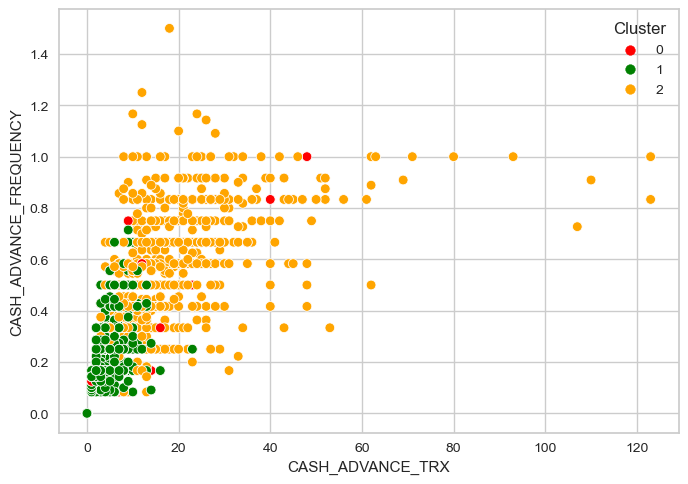

In [71]:
ax = sns.scatterplot(data =cluster_df,x= 'CASH_ADVANCE_TRX',y='CASH_ADVANCE_FREQUENCY',hue ='Cluster',palette=['red','green','orange','black','blue'] )                      
    
    

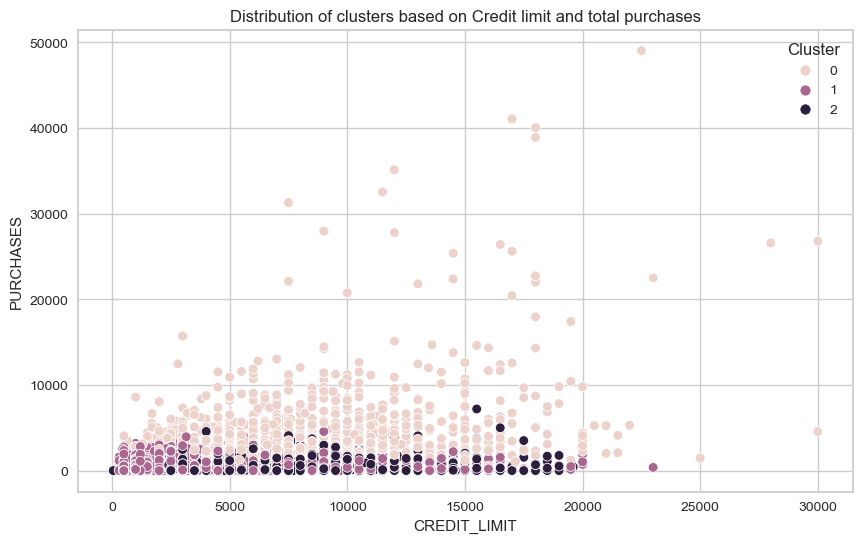

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_df, x='CREDIT_LIMIT', y='PURCHASES', hue='Cluster')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.histplot(cluster_df_1['balance'], color = 'red')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_df_2['balance'], color='green' )
plt.title('cluster 1', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_2['balance'], color='blue')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,4)
sns.histplot(cluster_3['balance'], color='purple')
plt.title('cluster 3', size = 16)
plt.show()

Text(0.5, 1.0, 'Purchases Persentage')

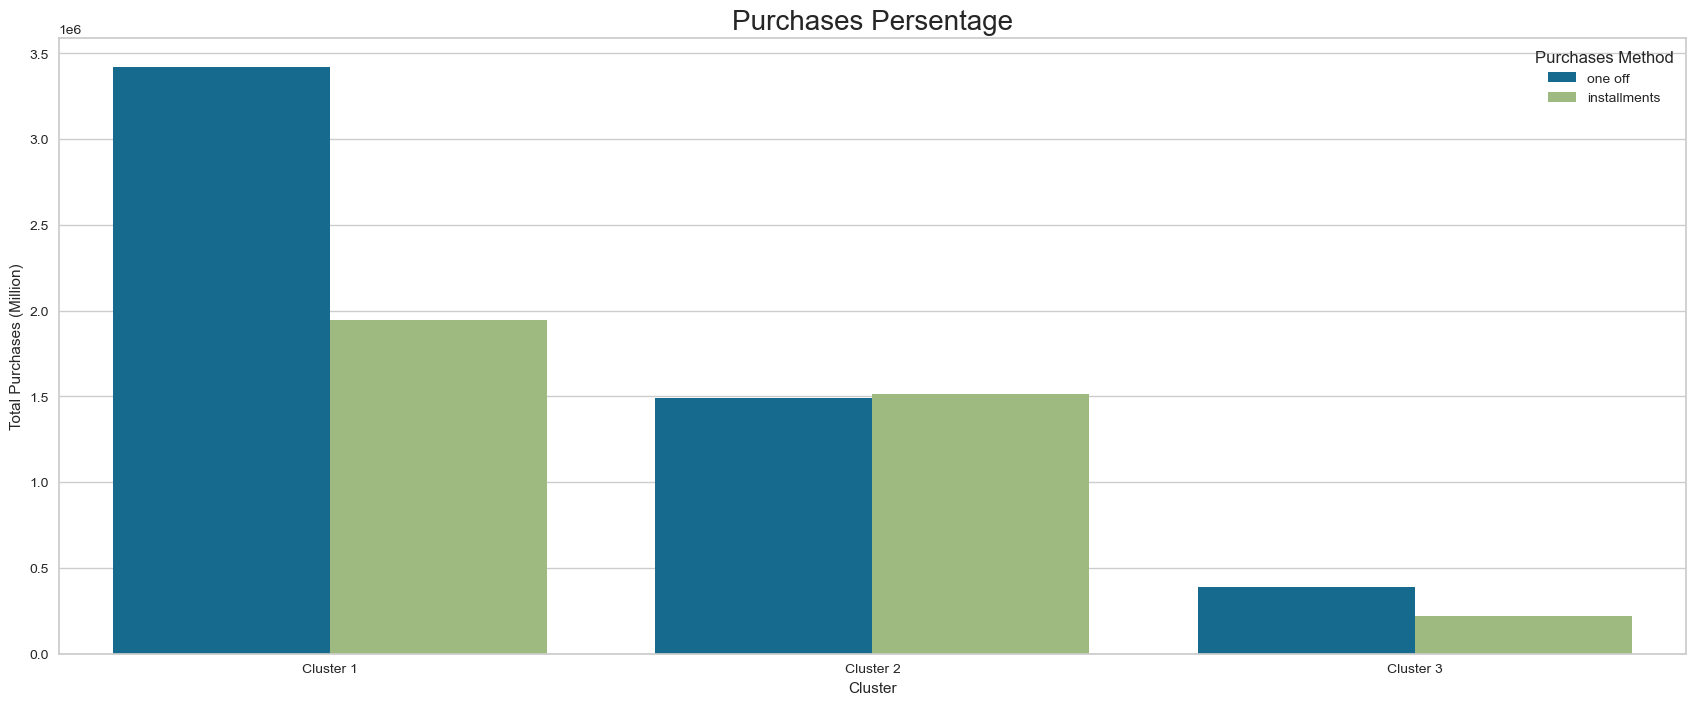

In [113]:
plt.figure(figsize=(21,8))
ax = pd.DataFrame({'Cluster' : ['Cluster 1', 'Cluster 1', 'Cluster 2', 'Cluster 2','Cluster 3', 'Cluster 3'],
                    'Purchases' : [cluster_df_1['ONEOFF_PURCHASES'].sum(), 
                                   cluster_df_1['INSTALLMENTS_PURCHASES'].sum(),
                                   cluster_df_2['ONEOFF_PURCHASES'].sum(), 
                                   cluster_df_2['INSTALLMENTS_PURCHASES'].sum(),
                                   cluster_df_3['ONEOFF_PURCHASES'].sum(), 
                                   cluster_df_3['INSTALLMENTS_PURCHASES'].sum()],
     'Purchases Method' : ['one off', 'installments', 'one off', 'installments', 'one off', 'installments']})
sns.barplot(x='Cluster', y='Purchases', data=ax, hue = 'Purchases Method' )
plt.ylabel('Total Purchases (Million)')
plt.xlabel('Cluster')
plt.title('Purchases Persentage', size = 20)

Text(0.5, 1.0, 'cluster 3')

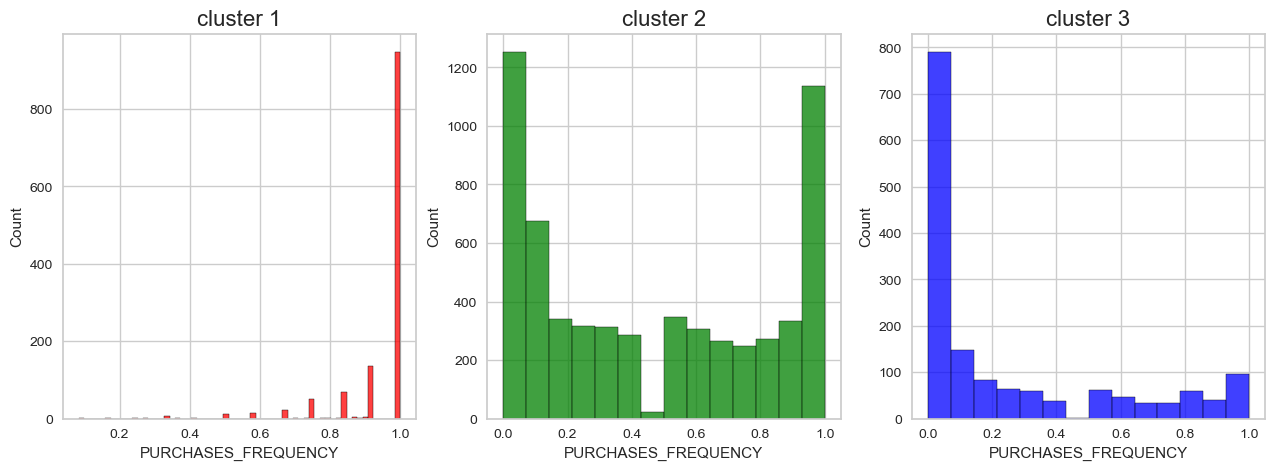

In [124]:
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_df_1['PURCHASES_FREQUENCY'], color = 'red')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_df_2['PURCHASES_FREQUENCY'], color='green')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_df_3['PURCHASES_FREQUENCY'], color='blue')
plt.title('cluster 3', size = 16)



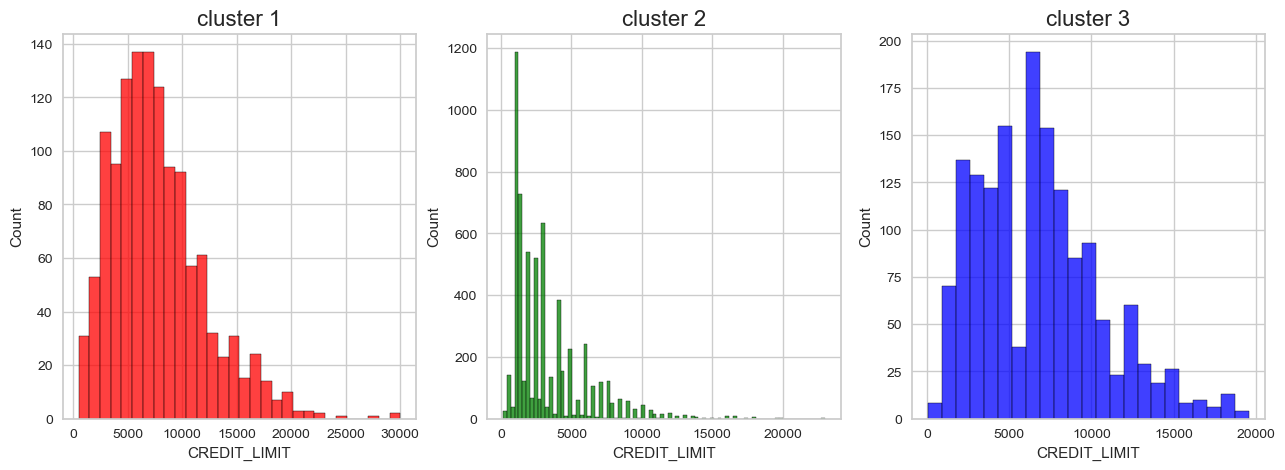

In [122]:
#plot comparison credit limit from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_df_1['CREDIT_LIMIT'], color = 'red')
plt.title('cluster 1', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_df_2['CREDIT_LIMIT'], color='green')
plt.title('cluster 2', size = 16)
plt.subplot(1,4,3)
sns.histplot(cluster_df_3['CREDIT_LIMIT'], color='blue')
plt.title('cluster 3', size = 16)
plt.show()

In [72]:
#Saving Scikitlearn models
import joblib
joblib.dump(km, "kmeans_model1.pkl")

['kmeans_model1.pkl']

In [73]:
cluster_df.to_csv("Updated_Target_Customer_Data1.csv")

## Supervised Algorithm

In [74]:
data_target = pd.read_csv("Updated_Target_Customer_Data1.csv",index_col=0)
data_target.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [75]:
#Split Dataset
X = data_target.drop(['Cluster'],axis=1)
y= data_target[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [76]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5974,1044.878512,1.000000,0.00,0.00,0.00,168.888837,0.000000,0.000000,0.000000,0.166667,2,0,1200.0,348.658967,269.844517,0.000000,12
884,902.099225,0.818182,5080.85,4674.21,406.64,0.000000,0.416667,0.333333,0.250000,0.000000,0,12,8000.0,177.879919,258.715978,0.000000,12
8441,43.865582,0.818182,0.00,0.00,0.00,551.777371,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,855.843792,105.639869,0.142857,12
2877,40.645069,1.000000,636.83,636.83,0.00,0.000000,0.666667,0.666667,0.000000,0.000000,0,8,7500.0,670.205252,182.978696,0.416667,12
4755,207.209597,1.000000,13.66,0.00,13.66,0.000000,0.090909,0.000000,0.090909,0.000000,0,1,7000.0,1703.339459,208.367436,0.000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5257,1191.749595,1.000000,0.00,0.00,0.00,1242.647518,0.000000,0.000000,0.000000,0.166667,2,0,2500.0,387.341388,352.084649,0.000000,12
7098,265.920698,1.000000,3148.36,2415.75,732.61,0.000000,1.000000,1.000000,0.833333,0.000000,0,63,4000.0,3140.255647,191.638318,1.000000,12
6911,311.987575,0.363636,684.24,0.00,684.24,0.000000,1.000000,0.000000,1.000000,0.000000,0,37,1000.0,2154.534733,508.095621,0.000000,12
7968,100.403989,1.000000,790.00,0.00,790.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,13,1000.0,573.971571,161.591908,0.600000,12


In [77]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4833,1109.172807,0.909091,190.00,190.00,0.00,1496.441591,0.083333,0.083333,0.000000,0.166667,5,1,1500.0,795.189855,331.294133,0.000000,12
6789,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8
6379,1631.573904,1.000000,112.56,112.56,0.00,0.000000,0.181818,0.181818,0.000000,0.000000,0,3,1700.0,439.132886,690.430521,0.000000,11
8208,492.947466,1.000000,0.00,0.00,0.00,1826.582575,0.000000,0.000000,0.000000,1.000000,27,0,2500.0,1675.261590,162.457032,0.375000,10
6668,20.502046,0.818182,53.36,0.00,53.36,0.000000,0.250000,0.000000,0.166667,0.000000,0,3,2500.0,88.897909,144.512685,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,813.068705,1.000000,439.38,439.38,0.00,727.658311,0.083333,0.083333,0.000000,0.250000,8,2,1200.0,237.996469,265.708814,0.000000,12
5059,4107.157763,1.000000,279.71,279.71,0.00,9337.271222,0.250000,0.250000,0.000000,0.416667,8,3,5000.0,8627.985927,1211.424432,0.166667,12
8460,40.661132,0.909091,235.30,0.00,235.30,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,1000.0,279.234480,161.075173,0.272727,12
8721,4.843351,0.090909,368.28,0.00,368.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,935.500113,29.977414,0.000000,12


In [78]:
#Decision_Tree
DT_model= DecisionTreeClassifier(criterion="entropy")
DT_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [79]:
y_pred = DT_model.predict(X_test)

In [80]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 360   35    4]
 [  44 1731   47]
 [  10   39  415]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       399
           1       0.96      0.95      0.95      1822
           2       0.89      0.89      0.89       464

    accuracy                           0.93      2685
   macro avg       0.91      0.92      0.91      2685
weighted avg       0.93      0.93      0.93      2685



In [81]:
import pickle
filename = 'final_model1.sav'
pickle.dump(DT_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9333333333333333 % Acuuracy
